In [12]:
import yaml, pickle

import pandas as pd

from wisdem.inputs.validation import write_yaml

import numpy as np

import matplotlib.pyplot as plt

%matplotlib

import os
import raft

Using matplotlib backend: MacOSX


In [2]:
# Read YAML file
with open("/Users/dzalkind/Tools/RAFT/designs/FOCTT_example.yaml", 'r') as stream:
    d = yaml.safe_load(stream)
    
    

In [3]:
bg = d['turbine']['blade']['geometry']

r = [b[0] for b in bg]
chord = [b[1] for b in bg]
theta = [np.radians(b[2]) for b in bg]
precurve = [b[3] for b in bg]
presweep = [b[4] for b in bg]

print(chord)
print(theta)
print(precurve)
print(presweep)

pitch_axis = 0.5 * np.ones(len(chord))
print(pitch_axis.tolist())

# len(chord)


[2.1, 2.1, 2.1, 2.08, 2.05, 2.02, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55]
[0.17325883484547708, 0.14727088228328153, 0.127426488688106, 0.10876891898428662, 0.09128071987930345, 0.07588691587671345, 0.06293657282691552, 0.05197590512439114, 0.04228932777582261, 0.0335801348083709, 0.025603980126756815, 0.018430676901060122, 0.01207767842380076, 0.0061959188445798695, 0.0003316125578789226, -0.0062482787221397, -0.014556045961632708, -0.02398082392240209, -0.032253684576855214, -0.03728023282259888, -0.03790855135331684, -0.036791540632040466, -0.03408628029144926, -0.029007372168145754]
[0.232, 0.25, 0.25, 0.246, 0.24, 0.233, 0.218, 0.178, 0.1, 0.0, -0.112, -0.244, -0.415, -0.62, -0.846, -1.08, -1.33, -1.602, -1.895, -2.202, -2.523, -2.864, -3.224, -3.605]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

In [4]:
d['turbine']['blade']

{'precurveTip': -3.9999999999999964,
 'presweepTip': 0.0,
 'Rtip': 10,
 'geometry': [[2.1, 2.1, 9.927, 0.232, 0.0],
  [2.4, 2.1, 8.438, 0.25, 0.0],
  [2.8, 2.1, 7.301, 0.25, 0.0],
  [3.1, 2.08, 6.232, 0.246, 0.0],
  [3.5, 2.05, 5.23, 0.24, 0.0],
  [3.8, 2.02, 4.348, 0.233, 0.0],
  [4.17, 1.9, 3.606, 0.218, 0.0],
  [4.5, 1.8, 2.978, 0.178, 0.0],
  [4.8, 1.7, 2.423, 0.1, 0.0],
  [5.2, 1.6, 1.924, 0.0, 0.0],
  [5.5, 1.5, 1.467, -0.112, 0.0],
  [5.9, 1.4, 1.056, -0.244, 0.0],
  [6.26, 1.3, 0.692, -0.415, 0.0],
  [6.6, 1.2, 0.355, -0.62, 0.0],
  [6.9, 1.1, 0.019, -0.846, 0.0],
  [7.3, 1, -0.358, -1.08, 0.0],
  [7.6, 0.9, -0.834, -1.33, 0.0],
  [7.99, 0.85, -1.374, -1.602, 0.0],
  [8.3, 0.8, -1.848, -1.895, 0.0],
  [8.7, 0.75, -2.136, -2.202, 0.0],
  [8.97, 0.7, -2.172, -2.523, 0.0],
  [9.31, 0.65, -2.108, -2.864, 0.0],
  [9.6, 0.6, -1.953, -3.224, 0.0],
  [9.99, 0.55, -1.662, -3.605, 0.0]],
 'airfoils': [[0.0, 'circular'],
  [0.02, 'circular'],
  [0.15, 'SNL-FFA-W3-500'],
  [0.24517, 'FFA-W

In [5]:
afs = d['turbine']['blade']['airfoils']

afs

[[0.0, 'circular'],
 [0.02, 'circular'],
 [0.15, 'SNL-FFA-W3-500'],
 [0.24517, 'FFA-W3-360'],
 [0.32884, 'FFA-W3-330blend'],
 [0.43918, 'FFA-W3-301'],
 [0.53767, 'FFA-W3-270blend'],
 [0.63821, 'FFA-W3-241'],
 [0.77174, 'FFA-W3-211'],
 [1.0, 'FFA-W3-211']]

In [10]:
g = d['turbine']['blade']['geometry']


r = np.array([gg[0] for gg in g])
r = r - r[0]

# g = np.linspace(0,1,num=len(r))
g = (r-r[0])/(r[-1]-r[0])
# print(g)

out = {}
out['z'] = {}
out['z']['values'] = r.tolist()
out['z']['grid'] = g.tolist()

write_yaml(out,'/Users/dzalkind/Tools/WEIS-4/WISDEM/examples/09_floating/foctt_grid.yaml')

print(g.tolist())
len(g)

[0.0, 0.038022813688212906, 0.08871989860583013, 0.12674271229404308, 0.1774397972116603, 0.2154626108998732, 0.26235741444866917, 0.3041825095057034, 0.3422053231939163, 0.3929024081115336, 0.43092522179974646, 0.4816223067173637, 0.5272496831432193, 0.5703422053231939, 0.6083650190114069, 0.659062103929024, 0.697084917617237, 0.7465145754119138, 0.7858048162230673, 0.8365019011406843, 0.8707224334600762, 0.9138149556400508, 0.9505703422053231, 1.0]


24

In [17]:
geom = {}
geom['airfoil_position'] = {}
geom['airfoil_position']['labels'] = [a[1] for a in afs]
geom['airfoil_position']['grid'] = [a[0] for a in afs]


In [18]:
geom

{'airfoil_position': {'labels': ['circular',
   'circular',
   'SNL-FFA-W3-500',
   'FFA-W3-360',
   'FFA-W3-330blend',
   'FFA-W3-301',
   'FFA-W3-270blend',
   'FFA-W3-241',
   'FFA-W3-211',
   'FFA-W3-211'],
  'grid': [0.0,
   0.02,
   0.15,
   0.24517,
   0.32884,
   0.43918,
   0.53767,
   0.63821,
   0.77174,
   1.0]}}

In [26]:
# Write YAML file
# with io.open('/Users/dzalkind/Tools/WEIS-4/WISDEM/examples/09_floating/foctt_af.yaml', 'w', encoding='utf8') as outfile:
#     yaml.dump(geom, outfile,  allow_unicode=True)
    
write_yaml(geom,'/Users/dzalkind/Tools/WEIS-4/WISDEM/examples/09_floating/foctt_af.yaml')

In [24]:
coord_x =  [1.0, 0.9966, 0.99314, 0.98961, 0.98601, 0.98235, 0.97863, 0.97484, 0.97098, 0.96706, 0.96307, 0.95902, 0.9549, 0.95072, 0.94647, 0.94216, 0.93778, 0.93333, 0.92882, 0.92425, 0.91961, 0.9149, 0.91013, 0.90529, 0.90039, 0.89542, 0.89039, 0.88529, 0.88013, 0.8749, 0.86961, 0.86425, 0.85882, 0.85333, 0.84778, 0.84216, 0.83647, 0.83072, 0.8249, 0.81902, 0.81307, 0.80706, 0.80098, 0.79484, 0.78863, 0.78235, 0.77601, 0.76961, 0.76314, 0.7566, 0.75, 0.74333, 0.73667, 0.73, 0.72333, 0.71667, 0.71, 0.70333, 0.69667, 0.69, 0.68333, 0.67667, 0.67, 0.66333, 0.65667, 0.65, 0.64333, 0.63667, 0.63, 0.62333, 0.61667, 0.61, 0.60333, 0.59667, 0.59, 0.58333, 0.57667, 0.57, 0.56333, 0.55667, 0.55, 0.54333, 0.53667, 0.53, 0.52333, 0.51667, 0.51, 0.50333, 0.49667, 0.49, 0.48333, 0.47667, 0.47, 0.46333, 0.45667, 0.45, 0.44333, 0.43667, 0.43, 0.42333, 0.41667, 0.41, 0.40333, 0.39667, 0.39, 0.38333, 0.37667, 0.37, 0.36333, 0.35667, 0.35, 0.34333, 0.33667, 0.33, 0.32333, 0.31667, 0.31, 0.30333, 0.29667, 0.29, 0.28333, 0.27667, 0.27, 0.26333, 0.25667, 0.25, 0.24342, 0.23693, 0.23053, 0.22421, 0.21798, 0.21184, 0.20579, 0.19982, 0.19395, 0.18816, 0.18245, 0.17684, 0.17131, 0.16587, 0.16052, 0.15526, 0.15008, 0.14499, 0.13999, 0.13508, 0.13026, 0.12552, 0.12087, 0.11631, 0.11183, 0.10745, 0.10315, 0.09893, 0.09481, 0.09077, 0.08683, 0.08297, 0.07919, 0.07551, 0.07191, 0.0684, 0.06498, 0.06164, 0.0584, 0.05524, 0.05217, 0.04918, 0.04629, 0.04348, 0.04076, 0.03812, 0.03558, 0.03312, 0.03075, 0.02847, 0.02627, 0.02417, 0.02215, 0.02022, 0.01837, 0.01662, 0.01495, 0.01337, 0.01187, 0.01047, 0.00915, 0.00792, 0.00678, 0.00572, 0.00476, 0.00388, 0.00309, 0.00238, 0.00177, 0.00124, 0.0008, 0.00044, 0.00018, 0.0, 0.00018, 0.00044, 0.0008, 0.00124, 0.00177, 0.00238, 0.00309, 0.00388, 0.00476, 0.00572, 0.00678, 0.00792, 0.00915, 0.01047, 0.01187, 0.01337, 0.01495, 0.01662, 0.01837, 0.02022, 0.02215, 0.02417, 0.02627, 0.02847, 0.03075, 0.03312, 0.03558, 0.03812, 0.04076, 0.04348, 0.04629, 0.04918, 0.05217, 0.05524, 0.0584, 0.06164, 0.06498, 0.0684, 0.07191, 0.07551, 0.07919, 0.08297, 0.08683, 0.09077, 0.09481, 0.09893, 0.10315, 0.10745, 0.11183, 0.11631, 0.12087, 0.12552, 0.13026, 0.13508, 0.13999, 0.14499, 0.15008, 0.15526, 0.16052, 0.16587, 0.17131, 0.17684, 0.18245, 0.18816, 0.19395, 0.19982, 0.20579, 0.21184, 0.21798, 0.22421, 0.23053, 0.23693, 0.24342, 0.25, 0.25667, 0.26333, 0.27, 0.27667, 0.28333, 0.29, 0.29667, 0.30333, 0.31, 0.31667, 0.32333, 0.33, 0.33667, 0.34333, 0.35, 0.35667, 0.36333, 0.37, 0.37667, 0.38333, 0.39, 0.39667, 0.40333, 0.41, 0.41667, 0.42333, 0.43, 0.43667, 0.44333, 0.45, 0.45667, 0.46333, 0.47, 0.47667, 0.48333, 0.49, 0.49667, 0.50333, 0.51, 0.51667, 0.52333, 0.53, 0.53667, 0.54333, 0.55, 0.55667, 0.56333, 0.57, 0.57667, 0.58333, 0.59, 0.59667, 0.60333, 0.61, 0.61667, 0.62333, 0.63, 0.63667, 0.64333, 0.65, 0.65667, 0.66333, 0.67, 0.67667, 0.68333, 0.69, 0.69667, 0.70333, 0.71, 0.71667, 0.72333, 0.73, 0.73667, 0.74333, 0.75, 0.7566, 0.76314, 0.76961, 0.77601, 0.78235, 0.78863, 0.79484, 0.80098, 0.80706, 0.81307, 0.81902, 0.8249, 0.83072, 0.83647, 0.84216, 0.84778, 0.85333, 0.85882, 0.86425, 0.86961, 0.8749, 0.88013, 0.88529, 0.89039, 0.89542, 0.90039, 0.90529, 0.91013, 0.9149, 0.91961, 0.92425, 0.92882, 0.93333, 0.93778, 0.94216, 0.94647, 0.95072, 0.9549, 0.95902, 0.96307, 0.96706, 0.97098, 0.97484, 0.97863, 0.98235, 0.98601, 0.98961, 0.99314, 0.9966, 1.0]
coord_y= [-0.00347, -0.00261, -0.00176, -0.00097, -0.00025, 0.0004, 0.00098, 0.00149, 0.00194, 0.00232, 0.00261, 0.00282, 0.00296, 0.00303, 0.00303, 0.00295, 0.00279, 0.00258, 0.00229, 0.00193, 0.00151, 0.00103, 0.00046, -0.00015, -0.00085, -0.0016, -0.00245, -0.00335, -0.00434, -0.00539, -0.00653, -0.00776, -0.00907, -0.01045, -0.01191, -0.01346, -0.0151, -0.01681, -0.01862, -0.0205, -0.02247, -0.02452, -0.02665, -0.02887, -0.03116, -0.03354, -0.036, -0.03853, -0.04114, -0.04382, -0.04658, -0.04941, -0.05228, -0.05519, -0.05814, -0.06112, -0.06413, -0.06717, -0.07024, -0.07333, -0.07645, -0.07958, -0.08274, -0.0859, -0.08909, -0.09228, -0.09549, -0.0987, -0.10192, -0.10515, -0.10838, -0.1116, -0.11482, -0.11804, -0.12125, -0.12446, -0.12765, -0.13083, -0.13399, -0.13713, -0.14024, -0.14333, -0.14639, -0.14942, -0.15242, -0.15537, -0.15828, -0.16115, -0.16397, -0.16673, -0.16945, -0.17212, -0.17473, -0.17727, -0.17976, -0.18219, -0.18454, -0.18683, -0.18905, -0.19119, -0.19327, -0.19527, -0.1972, -0.19904, -0.20081, -0.20248, -0.20407, -0.20556, -0.20697, -0.20827, -0.20948, -0.21057, -0.21155, -0.21243, -0.2132, -0.21384, -0.21437, -0.21476, -0.21502, -0.21516, -0.21515, -0.21501, -0.21472, -0.21429, -0.2137, -0.21297, -0.2121, -0.2111, -0.20996, -0.2087, -0.20733, -0.20584, -0.20425, -0.20257, -0.2008, -0.19894, -0.19698, -0.19496, -0.19287, -0.1907, -0.18847, -0.18616, -0.1838, -0.18137, -0.1789, -0.17635, -0.17376, -0.17111, -0.16842, -0.16567, -0.16289, -0.16006, -0.1572, -0.15429, -0.15135, -0.14835, -0.14535, -0.1423, -0.13922, -0.13612, -0.13299, -0.12982, -0.12665, -0.12344, -0.12023, -0.11698, -0.11374, -0.11047, -0.1072, -0.10392, -0.10064, -0.09733, -0.09406, -0.09076, -0.08748, -0.08421, -0.08092, -0.07766, -0.07437, -0.07107, -0.06775, -0.06446, -0.06113, -0.05781, -0.05447, -0.05117, -0.04785, -0.04453, -0.0412, -0.03783, -0.03442, -0.03085, -0.02716, -0.02333, -0.01956, -0.01591, -0.01247, -0.00905, -0.00567, 0.0, 0.00563, 0.00892, 0.01217, 0.01552, 0.0192, 0.02318, 0.02736, 0.03133, 0.03502, 0.03847, 0.04181, 0.04505, 0.04826, 0.05148, 0.05468, 0.0579, 0.06111, 0.06433, 0.06751, 0.0707, 0.07387, 0.07701, 0.08013, 0.08324, 0.08632, 0.0894, 0.09246, 0.09549, 0.09851, 0.1015, 0.10447, 0.1074, 0.11031, 0.11319, 0.11603, 0.11884, 0.12161, 0.12435, 0.12705, 0.12972, 0.13234, 0.13493, 0.13748, 0.13998, 0.14243, 0.14485, 0.14722, 0.14953, 0.15179, 0.15402, 0.15619, 0.15831, 0.16038, 0.1624, 0.16436, 0.16625, 0.16809, 0.16987, 0.17158, 0.17323, 0.17482, 0.17634, 0.17778, 0.17916, 0.18046, 0.18167, 0.18282, 0.18388, 0.18487, 0.18575, 0.18657, 0.18729, 0.18791, 0.18845, 0.1889, 0.18924, 0.1895, 0.18968, 0.18977, 0.18979, 0.18973, 0.18961, 0.1894, 0.18914, 0.18881, 0.18842, 0.18797, 0.18746, 0.1869, 0.18629, 0.18563, 0.18491, 0.18415, 0.18333, 0.18246, 0.18154, 0.18058, 0.17957, 0.17849, 0.17739, 0.17624, 0.17504, 0.17381, 0.17253, 0.1712, 0.16985, 0.16844, 0.16701, 0.16553, 0.16401, 0.16246, 0.16088, 0.15925, 0.15759, 0.15591, 0.15417, 0.15242, 0.15064, 0.14882, 0.14698, 0.14512, 0.14323, 0.14131, 0.13938, 0.13742, 0.13543, 0.13343, 0.13142, 0.12938, 0.12733, 0.12527, 0.12318, 0.12109, 0.11897, 0.11685, 0.11471, 0.11256, 0.1104, 0.10822, 0.10605, 0.10386, 0.10166, 0.09946, 0.09724, 0.09502, 0.09279, 0.09056, 0.08832, 0.08608, 0.08386, 0.08165, 0.07947, 0.0773, 0.07517, 0.07304, 0.07094, 0.06886, 0.0668, 0.06476, 0.06275, 0.06076, 0.05878, 0.05685, 0.05493, 0.05305, 0.05119, 0.04935, 0.04754, 0.04575, 0.04399, 0.04226, 0.04056, 0.03887, 0.03723, 0.0356, 0.034, 0.03242, 0.03087, 0.02936, 0.02786, 0.02639, 0.02495, 0.02352, 0.02212, 0.02074, 0.01937, 0.01803, 0.0167, 0.01539, 0.0141, 0.01283, 0.01158, 0.01035, 0.00914, 0.00795, 0.00678, 0.00565, 0.00455, 0.00347]




In [26]:
d['turbine']['airfoils']

afw = {}
afw['airfoils'] = []
# af_i


for af in d['turbine']['airfoils']:
    af_i = {}
    af_i['aerodynamic_center'] = 0. # don't know
    af_i['name'] = af['name']
    af_i['relative_thickness'] = af['relative_thickness']
    af_i['coordinates'] = {}
    af_i['coordinates']['x'] = coord_x
    af_i['coordinates']['y'] = coord_y

    af_i['polars'] = []
    af_i['polars'].append({})    
    af_i['polars'][0]['re'] = 1000000  # check this
    af_i['polars'][0]['configuration'] = 'Default'
    af_i['polars'][0]['c_m'] = {}
    af_i['polars'][0]['c_m']['grid'] = [float(np.radians(d[0])) for d in af['data']]
    af_i['polars'][0]['c_m']['values'] = [float(d[3]) for d in af['data']]

    af_i['polars'][0]['c_l'] = {}
    af_i['polars'][0]['c_l']['grid'] = [float(np.radians(d[0])) for d in af['data']]
    af_i['polars'][0]['c_l']['values'] = [float(d[1]) for d in af['data']]

    af_i['polars'][0]['c_d'] = {}
    af_i['polars'][0]['c_d']['grid'] = [float(np.radians(d[0])) for d in af['data']]
    af_i['polars'][0]['c_d']['values'] = [float(d[2]) for d in af['data']]
    
    afw['airfoils'].append(af_i)


write_yaml(afw,'/Users/dzalkind/Tools/WEIS-4/WISDEM/examples/09_floating/foctt_af.yaml')

In [35]:
af_i = {}
af_i['aerodynamic_center'] = 0. # don't know
af_i['polars'] = {}
af_i['polars']['re'] = 1000000  # check this
af_i['name'] = af['name']
af_i['relative_thickness'] = af['relative_thickness']
af_i['polars']['configuration'] = 'Default'
af_i['polars']['c_m'] = {}
af_i['polars']['c_m']['grid'] = [np.radians(d[0]) for d in af['data']]
af_i['polars']['c_m']['grid'] = [np.radians(d[3]) for d in af['data']]

af_i['polars']['c_l'] = {}
af_i['polars']['c_l']['grid'] = [np.radians(d[0]) for d in af['data']]
af_i['polars']['c_l']['grid'] = [np.radians(d[1]) for d in af['data']]

af_i['polars']['c_d'] = {}
af_i['polars']['c_d']['grid'] = [np.radians(d[0]) for d in af['data']]
af_i['polars']['c_d']['grid'] = [np.radians(d[2]) for d in af['data']]

af_i






{'aerodynamic_center': 0.0,
 'polars': {'re': 1000000,
  'configuration': 'Default',
  'c_m': {'grid': [0.0,
    0.00545415391248228,
    0.004941027112395947,
    0.004593706591249075,
    0.003574434308084387,
    0.0033719761148530447,
    0.0035046211380046137,
    0.0037280232822598882,
    0.003876376268679406,
    0.003836233695883536,
    0.003420845333908886,
    0.002853613327010729,
    0.0022427480888127134,
    0.0016842427281745281,
    0.00124965574442794,
    0.0009110618695410401,
    -0.00010995574287564277,
    -0.00015533430342749532,
    -0.00017278759594743865,
    -0.0001832595714594046,
    -0.00019198621771937625,
    -0.0002024581932313422,
    -0.00020943951023931956,
    -0.00021991148575128554,
    -0.00023561944901923448,
    -0.00024260076602721178,
    -0.0002495820830351891,
    -0.0002565634000431664,
    -0.00026354471705114377,
    -0.0002705260340591211,
    -0.0002757620218151041,
    -0.00028099800957108706,
    -0.00028623399732707005,
    -0.000

# Review WISDEM Outputs

In [4]:
out_csv = '/Users/dzalkind/Tools/WEIS-4/outputs/focct/1_rotor_underwater/refturb_output.csv'
df = pd.read_csv(out_csv)
npz = np.load(out_csv.strip('.csv') + '.npz')


In [6]:
# Find all powercurve outputs
ind = np.empty(len(df.variables),dtype=bool)
for i_var, var in enumerate(df.variables):
    if 'powercurve' in var:
        ind[i_var] = True
    else:
        ind[i_var] = False
        
        
df[ind]

,variables,units,values,description
152,rotorse.rp.powercurve.gearbox_efficiency,NaN,[0.975],NaN
153,rotorse.rp.powercurve.generator_efficiency,NaN,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,Generator efficiency at various rpm values to ...
154,rotorse.rp.powercurve.lss_rpm,rpm,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,Low speed shaft RPM values at which the genera...
156,rotorse.rp.powercurve.V,m/s,[2. 2.17346083 2.31418611 2.42001447 2...,wind vector
157,rotorse.rp.powercurve.Omega,rpm,[4.82163225 5.23981441 5.57907719 5.83420991 6...,rotor rotational speed
158,rotorse.rp.powercurve.P,W,[207298.33501995 266502.0974039 322076.116250...,rotor electrical power
619,rotorse.rp.powercurve.pitch,deg,[0. 0. 0. 0. 0...,rotor pitch schedule
620,rotorse.rp.powercurve.P_aero,W,[237357.37426148 304626.86012462 367711.819600...,rotor mechanical power
621,rotorse.rp.powercurve.T,N,[250758.94288208 296142.04681514 335732.206129...,rotor aerodynamic thrust
622,rotorse.rp.powercurve.Q,N*m,[470088.93388081 555167.03597717 629385.309392...,rotor aerodynamic torque


In [9]:

extract = ['rotorse.rp.powercurve.V',
           'rotorse.rp.powercurve.P',
           'rotorse.rp.powercurve.rated_pitch',
           'rotorse.rp.powercurve.Cp_aero'
          ]

outs = {}

for ext in extract:
    ind = df.variables == ext
    unit = df[ind].units.values[0]
    if type(unit) == str: 
        outs[ext] = npz[f'{ext}_{unit}']
        
    else:
        outs[ext] = npz[f'{ext}']
    # outs[ext] = df[ind]['values'].values

outs

{'rotorse.rp.powercurve.V': array([2.        , 2.17346083, 2.31418611, 2.42001447, 2.48932051,
        2.52103976, 2.52739446, 2.57172552, 2.65335206, 2.6773574 ,
        2.77102039, 2.92292326, 3.10672762, 3.31961045, 3.55830212,
        3.81913659, 4.09810776, 4.39093094, 4.69310873, 5.        ]),
 'rotorse.rp.powercurve.P': array([207298.33501995, 266502.0974039 , 322076.11625018, 368610.10149625,
        401392.22672598, 417021.55367956, 420201.03469912, 442830.71723021,
        486597.62622879, 500000.        , 500000.0432074 , 499999.99691442,
        499999.99999699, 499999.9998967 , 499999.99946657, 499999.52570115,
        499999.99818175, 499999.9978359 , 499998.1400943 , 500000.56731701]),
 'rotorse.rp.powercurve.rated_pitch': array([0.]),
 'rotorse.rp.powercurve.Cp_aero': array([0.18827878, 0.18827878, 0.18827878, 0.18827878, 0.18827878,
        0.18827878, 0.18827878, 0.18827878, 0.18827878, 0.18827878,
        0.16982628, 0.14470108, 0.12050761, 0.09877855, 0.08020391,
  

{'rotorse.rp.powercurve.V': array([ 3.        ,  4.27204607,  5.30403148,  6.08010611,  6.58835037,
         6.82095822,  6.86755938,  7.1926538 ,  7.79124841,  8.6541495 ,
         9.76810389, 11.11600255, 12.67714331, 14.42754887, 16.34033501,
        18.38612357, 19.31018777, 20.5334936 , 22.74946399, 25.        ]),
 'rotorse.rp.powercurve.P': array([  1047.89614351,   3076.61955116,   5933.46766469,   8973.0717249 ,
         11440.65146581,  12706.66552516,  12970.93738216,  14917.98839288,
         18994.14828908,  26084.72508058,  37590.46134681,  55509.54237681,
        141863.09499429, 211884.8294863 , 307626.62295977, 434148.50818254,
        500000.        , 500000.09451233, 499997.61236959, 500000.11056559]),
 'rotorse.rp.powercurve.rated_pitch': array([5.75858671]),
 'rotorse.rp.powercurve.Cp_aero': array([0.24408972, 0.24408972, 0.24408972, 0.24408972, 0.24408972,
        0.24408972, 0.24408972, 0.24408972, 0.24408972, 0.24408972,
        0.24408972, 0.24408972, 0.42041792

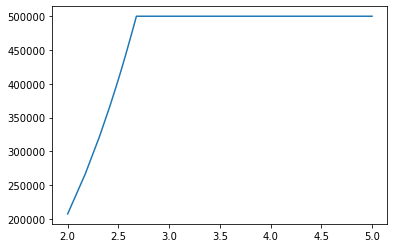

In [10]:
V = outs['rotorse.rp.powercurve.V']
P = outs['rotorse.rp.powercurve.P']

plt.plot(V,P)

In [56]:
a = df[ind]['values'].values
a = a[0].replace('\n','')
a

ast.literal_eval(a)

SyntaxError: invalid syntax (<unknown>, line 1)

In [66]:
outs

{'rotorse.rp.powercurve.V': array(['[ 3.          4.27204607  5.30403148  6.08010611  6.58835037  6.82095822\n  6.86755938  7.1926538   7.79124841  8.6541495   9.76810389 11.11600255\n 12.67714331 14.42754887 16.34033501 18.38612357 19.31018777 20.5334936\n 22.74946399 25.        ]'],
       dtype=object),
 'rotorse.rp.powercurve.P': array(['[  1047.89614351   3076.61955116   5933.46766469   8973.0717249\n  11440.65146581  12706.66552516  12970.93738216  14917.98839288\n  18994.14828908  26084.72508058  37590.46134681  55509.54237681\n 141863.09499429 211884.8294863  307626.62295977 434148.50818254\n 500000.         500000.09451233 499997.61236959 500000.11056559]'],
       dtype=object),
 'rotorse.rp.powercurve.rated_pitch': array(['[5.75858671]'], dtype=object)}

In [69]:
b['rotorse.rp.powercurve.V_m/s']
    

array([ 3.        ,  4.27204607,  5.30403148,  6.08010611,  6.58835037,
        6.82095822,  6.86755938,  7.1926538 ,  7.79124841,  8.6541495 ,
        9.76810389, 11.11600255, 12.67714331, 14.42754887, 16.34033501,
       18.38612357, 19.31018777, 20.5334936 , 22.74946399, 25.        ])

In [11]:
# Platform design

d['platform']['members']
# d['mooring']

[{'name': 'upper_column',
  'type': 2,
  'rA': [0, 0, -2.5],
  'rB': [0, 0, 9],
  'shape': 'circ',
  'gamma': 0.0,
  'potMod': True,
  'stations': [0, 1],
  'd': 2.0,
  't': 0.03,
  'Cd': 1.1,
  'Ca': 1.0,
  'CdEnd': 1.1,
  'CaEnd': 0.0,
  'rho_shell': 7850,
  'cap_stations': [0],
  'cap_t': [0.001],
  'cap_d_in': [0]},
 {'name': 'mooring_fins',
  'type': 2,
  'rA': [0, 10, -2.15],
  'rB': [0, -10, -2.15],
  'shape': 'circ',
  'gamma': 0.0,
  'potMod': True,
  'stations': [0, 1],
  'd': 0.5,
  't': 0.03,
  'Cd': 1.1,
  'Ca': 1.0,
  'CdEnd': 1.1,
  'CaEnd': 0.0,
  'rho_shell': 7850,
  'cap_stations': [0],
  'cap_t': [0.001],
  'cap_d_in': [0]}]

In [17]:

# find joints in members
# joints have names, locations in xyz or cylindrical coords

joints = []
members = []

for m in d['platform']['members']:
    # Joint info
    joint_a = {}
    joint_a['name'] = m['name'] + '_a'
    joint_a['location'] = m['rA']
    
    joint_b = {}
    joint_b['name'] = m['name'] + '_b'
    joint_b['location'] = m['rB']
    
    joints.append(joint_a)
    joints.append(joint_b)
    
    # Member info
    member = {}
    member['name'] = m['name']
    member['joint1'] = joint_a['name']
    member['joint2'] = joint_b['name']
    
    member['outer_shape'] = {}
    member['outer_shape']['shape'] = 'circular'  # all WEIS members are circular now
    member['outer_shape']['outer_diameter'] = {}
    member['outer_shape']['outer_diameter']['grid'] = m['stations']
    if hasattr(m['d'],'__len__'): # is array
        member['outer_shape']['outer_diameter']['values'] = m['d']
    else:
        member['outer_shape']['outer_diameter']['values'] = len(m['stations']) * [m['d']]
        
    member['internal_structure'] = {}
    member['internal_structure']['layers'] = []
    layer = {}
    layer['name'] = 'main_twall'
    layer['material'] = 'steel'
    layer['thickness'] = {}
    layer['thickness']['grid'] = m['stations']
        
    if hasattr(m['t'],'__len__'): # is array
        layer['thickness']['values'] = m['t']
    else:
        layer['thickness']['values'] = len(m['stations']) * [m['t']]
        
    member['internal_structure']['layers'].append(layer)
        
    # skip bulkhead
    # skip ballast
    
    # axial joints (sometimes used as fairlead joints)?
    
    members.append(member)
    
        
# add mooring "joints"
for p in d['mooring']['points']:

    # For now, do all points, might want only fixed points and vessel points would be axial joints on corresponding member
    joint = {}
    joint['name'] = p['name']
    joint['location'] = p['location']
    joints.append(joint)
    # joint_a['location'] = m['rA']
    
# mooring nodes
{'name': 'back_anchor',
 'type': 'fixed',
 'location': [-200, 0.0, -60.0],
 'anchor_type': 'drag_embedment'}

nodes = []
for n in d['mooring']['points']:
    node = {}
    node['name'] = n['name']
    node['node_type'] = n['type']
    
    if n['type'] == 'vessel':
        node['fairlead_type'] = 'rigid'
    else:
        node['anchor_type'] = n['anchor_type']
        
    # find closest joint, could be issues if duplicates
    dist = np.array([np.linalg.norm(np.array(j['location']) - np.array(n['location'])) for j in joints])
    node['joint'] = joints[np.argmin(dist)]['name']    
    
    nodes.append(node)


# mooring lines
lines = []
for l in d['mooring']['lines']:
    line = {}
    line['name'] = l['name']
    line['node1'] = l['endA']
    line['node2'] = l['endB']
    line['type'] = l['type']
    line['unstretched_length'] = l['length']
    
    lines.append(line)
    
# line types
line_types = []
for lt in d['mooring']['line_types']:
    line_type = {}
    line_type['name'] = lt['name']
    line_type['line_type'] = lt['name']
    line_type['diameter'] = lt['diameter']
    line_type['transverse_added_mass'] = lt['transverse_added_mass']
    line_type['tangential_added_mass'] = lt['tangential_added_mass']
    line_type['transverse_drag'] = lt['transverse_drag']
    line_type['tangential_drag'] = lt['tangential_drag']
    
    line_types.append(line_type)
    
# anchor types
anchor_types = []
for at in d['mooring']['anchor_types']:
    anchor_type = {}
    anchor_type['name'] = at['name']
    anchor_type['type'] = 'drag_embedment'  # hard code for now, not sure if there are enumeration of types in WISDEM
    anchor_types.append(anchor_type)
    
    
    
mooring = {}
mooring['nodes'] = nodes
mooring['lines'] = lines
mooring['line_types'] = line_types
mooring['anchor_types'] = anchor_types

floating_platform = {}
floating_platform['members'] = members
floating_platform['joints'] = joints


write_yaml(floating_platform,'/Users/dzalkind/Tools/WEIS-4/WISDEM/examples/09_floating/foctt_floating.yaml')
write_yaml(mooring,'/Users/dzalkind/Tools/WEIS-4/WISDEM/examples/09_floating/foctt_mooring.yaml')


In [70]:
n['location']

# find closest joint, issues if duplicates
d = np.array([np.linalg.norm(np.array(j['location']) - np.array(n['location'])) for j in joints])
joints[np.argmin(d)]['name']

# for j in joints:
    # d = np.linalg.norm(np.array(j['location']) - np.array(n['location']))
    # print(d)


# joints

'mooring_fins_a'

In [10]:
d['turbine']['tower']

{'dlsMax': 5.0,
 'name': 'tower',
 'type': 1,
 'rA': [0, 0, -2.5],
 'rB': [0, 0, -33.5],
 'shape': 'circ',
 'gamma': 0.0,
 'stations': [-2.5, -31, -33.5],
 'd': [1.25, 1.25, 0.25],
 't': [0.03, 0.03, 0.03],
 'Cd': 1.1,
 'Ca': 1.0,
 'CdEnd': 1.1,
 'CaEnd': 0.0,
 'rho_shell': 7850}

# Compare WEIS and RAFT models

In [33]:
weis_pkl = '/Users/dzalkind/Tools/WEIS-4/outputs/focct/3_FOCCT_WEIS_RAFT/raft_designs/raft_design_0.pkl'


with open(weis_pkl,'rb') as f:
    d_weis = pickle.load(f)


raft_yaml = '/Users/dzalkind/Tools/WEIS-4/RAFT/designs/FOCTT_example.yaml'

    
with open(raft_yaml, 'r') as stream:
    d_raft = yaml.safe_load(stream)

In [27]:
# d_weis

# d_raft

from deepdiff import DeepDiff


In [28]:
diff = DeepDiff(d_weis['platform'], d_raft['platform'])
print (diff.pretty())



Item root['min_freq_BEM'] removed from dictionary.
Item root['members'][0]['l_fill'] removed from dictionary.
Item root['members'][0]['rho_fill'] removed from dictionary.
Item root['members'][1]['l_fill'] removed from dictionary.
Item root['members'][1]['rho_fill'] removed from dictionary.
Type of root['members'][0]['rA'] changed from float64 to list and value changed from [ 0.   0.  -2.5] to [0, 0, -2.5].
Type of root['members'][0]['rB'] changed from float64 to list and value changed from [0. 0. 9.] to [0, 0, 9].
Type of root['members'][0]['stations'] changed from float64 to list and value changed from [0.   0.05 1.  ] to [0, 1].
Type of root['members'][0]['d'] changed from float64 to float and value changed from [2. 2. 2.] to 2.0.
Type of root['members'][0]['t'] changed from float64 to float and value changed from [0.03 0.03 0.03] to 0.03.
Type of root['members'][0]['Cd'] changed from float64 to float and value changed from [0.8 0.8 0.8] to 1.1.
Type of root['members'][0]['Ca'] chang

In [8]:
for key in d_weis:
    print(key)

type
name
comments
settings
site
turbine
platform
mooring
cases


In [30]:
d_weis['turbine']['tower']
diff = DeepDiff(d_weis['turbine']['tower'], d_raft['turbine']['tower'])
print (diff.pretty())

Item root['dlsMax'] added to dictionary.
Type of root['rA'] changed from float64 to list and value changed from [ 0.   0.  -2.5] to [0, 0, -2.5].
Type of root['rB'] changed from float64 to list and value changed from [ 0.   0.  17.7] to [0, 0, -33.5].
Type of root['gamma'] changed from float64 to float and value changed from [0.] to 0.0.
Type of root['stations'] changed from float64 to list and value changed from [0.         0.91935484 1.        ] to [-2.5, -31, -33.5].
Type of root['d'] changed from float64 to list and value changed from [1.25 1.25 0.25] to [1.25, 1.25, 0.25].
Type of root['t'] changed from float64 to list and value changed from [0.03 0.03 0.03] to [0.03, 0.03, 0.03].
Type of root['Cd'] changed from float64 to float and value changed from [0.         0.33888262 1.18776357] to 1.1.
Type of root['Ca'] changed from float64 to float and value changed from [0. 0. 0.] to 1.0.
Type of root['CdEnd'] changed from float64 to float and value changed from [0. 0. 0.] to 1.1.
Type 

In [35]:
diff = DeepDiff(d_weis['mooring'], d_raft['mooring'])
print (diff.pretty())

Type of root['water_depth'] changed from float to int and value changed from 200.0 to 60.
Type of root['points'][0]['location'] changed from float64 to list and value changed from [-200.    0.  -60.] to [-200, 0.0, -60.0].
Type of root['points'][1]['location'] changed from float64 to list and value changed from [-201.  -50.  -60.] to [-201, -50.0, -60.0].
Type of root['points'][2]['location'] changed from float64 to list and value changed from [-201.   50.  -60.] to [-201, 50.0, -60.0].
Type of root['points'][3]['location'] changed from float64 to list and value changed from [200.   0. -60.] to [200, 0.0, -60.0].
Type of root['points'][4]['location'] changed from float64 to list and value changed from [200. -50. -60.] to [200, -50.0, -60.0].
Type of root['points'][5]['location'] changed from float64 to list and value changed from [200.  50. -60.] to [200, 50.0, -60.0].
Type of root['points'][6]['location'] changed from float64 to list and value changed from [  0.    0.  -33.5] to [0.0,

In [24]:
d_raft['turbine']['tower']


{'dlsMax': 5.0,
 'name': 'tower',
 'type': 1,
 'rA': [0, 0, -2.5],
 'rB': [0, 0, -33.5],
 'shape': 'circ',
 'gamma': 0.0,
 'stations': [-2.5, -31, -33.5],
 'd': [1.25, 1.25, 0.25],
 't': [0.03, 0.03, 0.03],
 'Cd': 1.1,
 'Ca': 1.0,
 'CdEnd': 1.1,
 'CaEnd': 0.0,
 'rho_shell': 7850}

In [34]:
# set up the model

model = raft.Model(d_weis)
model.analyzeUnloaded(
    ballast= True, 
    heave_tol = 1.0
    )

model.plot()

adjusting ballast fill levels
Found mean offets with with surge = -0.53 m and pitch = -0.92 deg.


(<Figure size 1229x591 with 1 Axes>, <Axes3DSubplot:>)